In [275]:
# Classic Imports
import pandas as pd
import re
import copy
import numpy as np
import matplotlib.pyplot as plt

In [276]:
# Getting all the Datasets
before = pd.read_csv('CSV\BeforeRedData.csv')
after = pd.read_csv('CSV\AfterRedData.csv')

In [277]:
def rangeTwo(x, y):
    Final = []
    while x < y:
        Final.append(x)
        x = x + 1
    return Final

def createList(dataset):
    reform_list = []
    for reform in dataset.index:
        place_holder_list = [0, 0, 0]
        for holder in rangeTwo(0, (len(dataset.columns) - 1)):
            column_name = 'M' + str(holder)
            holder_in = dataset.loc[reform, column_name]
            if holder_in == 1:
                place_holder_list[0] = place_holder_list[0] + 1
            elif holder_in == 3:
                place_holder_list[2] = place_holder_list[2] + 1
            elif holder_in == 4:
                place_holder_list[0] = place_holder_list[0] + 1
            elif holder_in == -1:
                place_holder_list[1] = place_holder_list[1] + 1
            elif holder_in == -4:
                place_holder_list[1] = place_holder_list[1] + 1
        reform_list.append(place_holder_list)
        
    return reform_list

test_input = createList(before)
test_output = createList(after)

In [278]:
before_test = pd.DataFrame(test_input, columns=['Goal_Home', 'Goal_Away', 'Red_Card'])
after_test = pd.DataFrame(test_output, columns=['Goal_Home', 'Goal_Away', 'Red_Card'])

In [279]:
# Adding score rate and red card time
total_score_rate_list = []
time_red_card = []
for score_rate_total_list in before.index:
    total_goal_home = 0
    total_goal_away = 0
    red_card_position = 0
    for score_rate in rangeTwo(0, len(before.columns) - 1):
        score_rate_column = 'M' + str(score_rate)
        total_check = before.loc[score_rate_total_list, score_rate_column]
        if total_check == 1:
            total_goal_home = total_goal_home + 1
        elif total_check == -1:
            total_goal_away = total_goal_away + 1
        elif total_check == 3 or total_check == -3:
            red_card_position = score_rate
    if red_card_position > 0:
        score_rate_list_place_holder = []
        score_rate_goal_home = total_goal_home / red_card_position 
        score_rate_goal_away = total_goal_away / red_card_position
        score_rate_list_place_holder.append(score_rate_goal_home)
        score_rate_list_place_holder.append(score_rate_goal_away)
        total_score_rate_list.append(score_rate_list_place_holder)
        if red_card_position <= 15:
            time_red_card.append(1)
        elif red_card_position > 15 and red_card_position <= 30:
            time_red_card.append(2)
        elif red_card_position > 30 and red_card_position <= 45:
            time_red_card.append(3)
        elif red_card_position > 45 and red_card_position <= 60:
            time_red_card.append(4)
        elif red_card_position > 60 and red_card_position <= 75:
            time_red_card.append(5)
        elif red_card_position > 75:
            time_red_card.append(6)
    if red_card_position == 0:
        score_rate_list_place_holder = []
        score_rate_goal_home = total_goal_home / 1
        score_rate_goal_away = total_goal_away / 1
        score_rate_list_place_holder.append(score_rate_goal_home)
        score_rate_list_place_holder.append(score_rate_goal_away)
        total_score_rate_list.append(score_rate_list_place_holder)
        if red_card_position <= 15:
            time_red_card.append(1)
        elif red_card_position > 15 and red_card_position <= 30:
            time_red_card.append(2)
        elif red_card_position > 30 and red_card_position <= 45:
            time_red_card.append(3)
        elif red_card_position > 45 and red_card_position <= 60:
            time_red_card.append(4)
        elif red_card_position > 60 and red_card_position <= 75:
            time_red_card.append(5)
        elif red_card_position > 75:
            time_red_card.append(6)

In [280]:
score_rate_home = []
score_rate_away  = []
for actual_score_rate in total_score_rate_list:
    if actual_score_rate[0] <= 0.01:
        score_rate_home.append(1)
    elif actual_score_rate[0] > 0.01 and actual_score_rate[0] <= 0.02:
        score_rate_home.append(2)
    elif actual_score_rate[0] > 0.02 and actual_score_rate[0] <= 0.03:
        score_rate_home.append(3)
    elif actual_score_rate[0] > 0.03 and actual_score_rate[0] <= 0.04:
        score_rate_home.append(4)
    elif actual_score_rate[0] > 0.04 and actual_score_rate[0] < 0.05:
        score_rate_home.append(5)
    elif actual_score_rate[0] >= 0.05:
        score_rate_home.append(6)
        
    if actual_score_rate[1] <= 0.01:
        score_rate_away.append(1)
    elif actual_score_rate[1] > 0.01 and actual_score_rate[1] <= 0.02:
        score_rate_away.append(2)
    elif actual_score_rate[1] > 0.02 and actual_score_rate[1] <= 0.03:
        score_rate_away.append(3)
    elif actual_score_rate[1] > 0.03 and actual_score_rate[1] <= 0.04:
        score_rate_away.append(4)
    elif actual_score_rate[1] > 0.04 and actual_score_rate[1] < 0.05:
        score_rate_away.append(5)
    elif actual_score_rate[1] >= 0.05:
        score_rate_away.append(6)

before_test.insert(3, "Score_Rate_Home", score_rate_home, True)
before_test.insert(4, "Score_Rate_Away", score_rate_away, True)
# before_test.insert(5, "Red_Time", time_red_card, True)

In [282]:
before_test = before_test.drop(count_list)

In [283]:
before_test

,Goal_Home,Goal_Away,Red_Card,Score_Rate_Home,Score_Rate_Away
0,2,1,1,4,2
2,1,0,0,6,1
3,1,1,0,3,3
4,0,1,0,1,2
7,1,0,0,4,1
...,...,...,...,...,...
3558,2,0,0,3,1
3559,1,0,0,2,1
3561,0,1,0,1,5
3562,3,1,0,6,2


In [284]:
after_test = after_test.drop(count_list)

In [285]:
after_test_plus = after_test.copy()
range_test = ['Goal_Home', 'Goal_Away']
for equal in after_test_plus.index:
    for equal_test in range_test:
        after_test_plus.loc[equal, equal_test] = after_test_plus.loc[equal, equal_test] + before_test.loc[equal, equal_test]

In [286]:
after_test

,Goal_Home,Goal_Away,Red_Card
0,0,3,1
2,2,0,0
3,1,0,0
4,1,0,0
7,5,0,0
...,...,...,...
3558,0,0,0
3559,2,0,0
3561,2,0,0
3562,2,0,0


In [371]:
x = before_test.iloc[:, range(0, 5)].values
y = after_test.iloc[:, 0].values

In [372]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [373]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(x_train, y_train)

SVC(random_state=0)

In [374]:
y_pred_svm = classifier_svm.predict(x_test)

In [375]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test,y_pred_svm)

[[533   9   0   0   0   0]
 [173   7   0   0   0   0]
 [ 40   7   0   0   0   0]
 [ 17   4   0   0   0   0]
 [  2   3   0   0   0   0]
 [  1   0   0   0   0   0]]


0.678391959798995

In [376]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=35)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [377]:
y_pred_knn = classifier_knn.predict(x_test)

In [378]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[524  18   0   0   0   0]
 [150  30   0   0   0   0]
 [ 35  12   0   0   0   0]
 [ 14   7   0   0   0   0]
 [  1   4   0   0   0   0]
 [  1   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       542
           1       0.42      0.17      0.24       180
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.70       796
   macro avg       0.19      0.19      0.18       796
weighted avg       0.59      0.70      0.62       796



C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [379]:
error = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

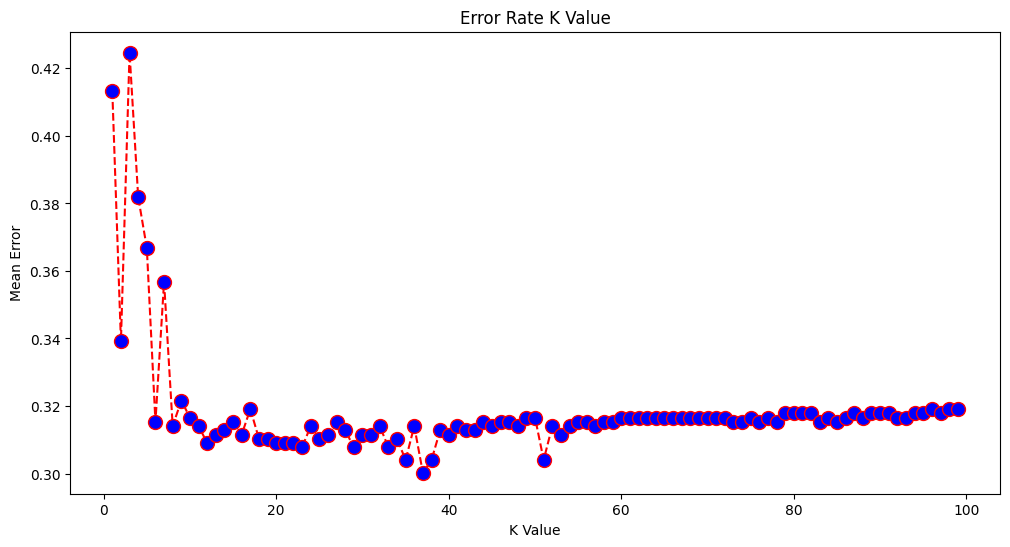

In [380]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [381]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [382]:
y_pred_randomForest = rf.predict(x_test)

In [383]:
accuracy = accuracy_score(y_test, y_pred_randomForest)
print("Accuracy:", accuracy)

Accuracy: 0.6834170854271356


In [384]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [385]:
y_pred_logistic = logistic.predict(x_test)

In [386]:
score_logistic = logistic.score(x_test, y_test)
print(score_logistic)

0.6922110552763819


In [387]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

from xgboost import XGBClassifier
learn = XGBClassifier()
learn.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [388]:
y_pred_XG = learn.predict(x_test)
y_pred_XG = le.inverse_transform(y_pred_XG)
cm = confusion_matrix(y_test, y_pred_XG)
print(cm)
accuracy_score(y_test, y_pred_XG)

[[504  32   4   2   0   0]
 [145  35   0   0   0   0]
 [ 33  13   1   0   0   0]
 [ 13   6   2   0   0   0]
 [  0   3   0   2   0   0]
 [  0   1   0   0   0   0]]


0.678391959798995

In [281]:
count_list = []
count = 0 
for x in total_score_rate_list:
    if x == [0.0, 0.0]:
        count_list.append(count)
    count = count + 1